In [1]:
%matplotlib inline
import matplotlib.pylab as plt

import numpy as np
import pandas as pd
import json
from datetime import datetime as dt
from collections import Counter

import bandicoot_dev as bc_d

In [2]:
def _compute_features(userid, tc="tc0", groupby="week", summary="special"):
    
    user = bc_d.read_csv(
        "%d" % userid, 
        call_path="build_dataset/data_cache/records/call/%s/" % tc,
        text_path="build_dataset/data_cache/records/text/%s/" % tc,
        physical_path="build_dataset/data_cache/records/physical/%s/" % tc,
        screen_path="build_dataset/data_cache/records/screen/%s/" % tc,
        stop_path="build_dataset/data_cache/records/stop/%s/" % tc, 
        network=False,
        describe=False
    )
    
    user.start_time['any'] = dt.strptime('01/01/14', "%d/%m/%y")
    user.end_time['any'] = dt.strptime('01/01/15', "%d/%m/%y")
    
    indicators = bc_d.utils.all(
        user,
        groupby=groupby,
        summary=summary,
        dist=True,
        network=False,
        spatial=False
    )

    for ex in ['name', 'reporting']:
        del indicators[ex]

    return bc_d.utils.flatten(indicators), user

In [2]:
# TEST USER
userid = 0
tc = "tc1_spring"

user = bc_d.read_csv(
    "%d" % userid, 
    call_path="build_dataset/data_cache/records/call/%s/" % tc,
    text_path="build_dataset/data_cache/records/text/%s/" % tc,
    physical_path="build_dataset/data_cache/records/physical/%s/" % tc,
    screen_path="build_dataset/data_cache/records/screen/%s/" % tc,
    stop_path="build_dataset/data_cache/records/stop/%s/" % tc, 
    network=False,
    describe=False
)

In [3]:
# Number of contacts
vals = bc_d.individual.number_of_contacts(
    user,
    groupby=None,
)['allweek']['allday']

print vals['stop'] == len(
    filter(
        lambda x: x[1] > 1,
        Counter(
            r.position for r in user.stop_records
        ).items()
    )
)

print vals['text+call'] == len(
    filter(
        lambda x: x[1] > 1,
        Counter(
            r.correspondent_id for r in user.text_records + user.call_records
                if hasattr(r, 'duration') and r.duration > 5
                or not hasattr(r, 'duration')
        ).items()
    )
)

True
True


In [4]:
# Number of interactions
vals = bc_d.individual.number_of_interactions(
    user,
    groupby=None,
)['allweek']['allday']

print vals['physical'] == len(user.physical_records) * 1.0 / \
    (max(user.physical_records, key=lambda r: r.datetime).datetime - \
     min(user.physical_records, key=lambda r: r.datetime).datetime).days

False


In [5]:
vals

{'physical': 110.70731707317073,
 'stop': 4.128,
 'text+call': 28.831615999999855}

In [7]:
len(user.physical_records) * 1.0 / \
    (max(user.physical_records, key=lambda r: r.datetime).datetime - \
     min(user.physical_records, key=lambda r: r.datetime).datetime).days

82.52727272727273

In [73]:
(max(user.physical_records, key=lambda r: r.datetime).datetime - \
     min(user.physical_records, key=lambda r: r.datetime).datetime).days

357

In [80]:
len(set(r.datetime.date() for r in user.physical_records))

238

In [82]:
user.end_time['any']

datetime.datetime(2014, 12, 30, 23, 52, 34)

(array([ 5091.,  2709.,  3110.,  4834.,  3202.,  3979.,    36.,    11.,
           43.,   812.]),
 array([   5. ,   40.8,   76.6,  112.4,  148.2,  184. ,  219.8,  255.6,
         291.4,  327.2,  363. ]),
 <a list of 10 Patch objects>)

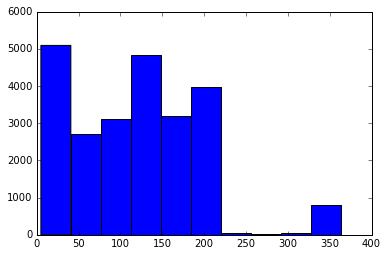

In [116]:
plt.hist([r.datetime.timetuple().tm_yday for r in user.physical_records])

In [114]:
len(a)

330

In [6]:
pd.options.display.max_rows = 400
pd.read_csv("build_dataset/data_cache/records/call/%s/0.csv" % tc, sep=",")

,duration,correspondent_id,datetime,direction,interaction
0,32,-96270,2014-01-06 10:23:36,out,call
1,0,-96270,2014-01-06 16:25:50,in,call
2,292,-96270,2014-01-06 16:48:02,out,call
3,2,-96270,2014-01-07 15:30:48,out,call
4,347,-96270,2014-01-07 17:10:46,out,call
5,0,-95685,2014-01-08 13:56:04,out,call
6,86,-95685,2014-01-08 14:11:49,out,call
7,18,-98593,2014-01-08 16:43:38,out,call
8,1095,-98593,2014-01-08 16:44:33,in,call
9,2,-96270,2014-01-10 14:13:15,out,call
